In [1]:
from collections import OrderedDict
import pandas as pd

design_outputs = OrderedDict()

## Wind Only

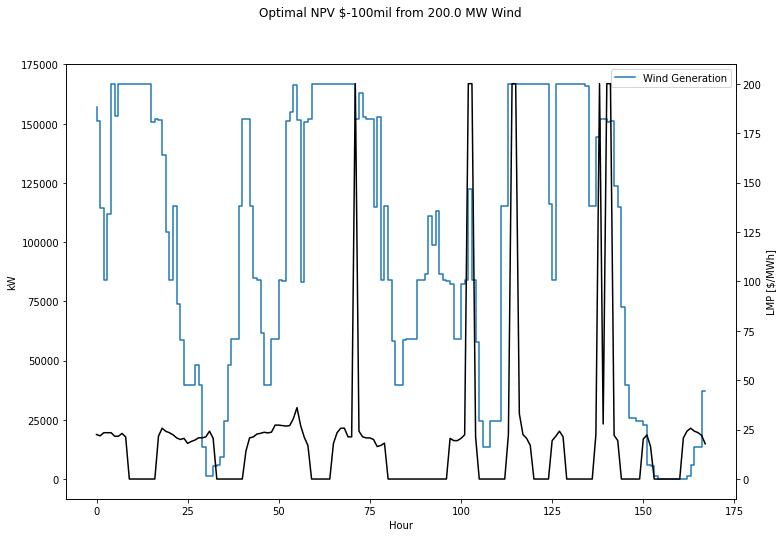

Wind MW:  200.0
elec Rev $:  263976.690506011
NPV $: -99985625.1538023


In [2]:
from dispatches.models.renewables_case.wind_LMP import wind_optimize

wind_mw, rev, NPV = wind_optimize()

design_outputs['Wind'] = {
    'NPV': NPV, 'Rev_E': rev, 'wind_mw': wind_mw
}

## Wind + PEM

Assuming existing wind farm of 200 MW

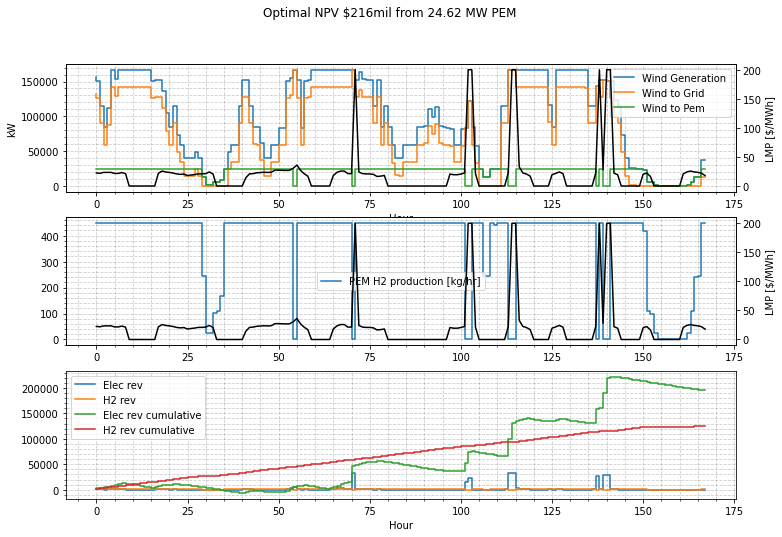

wind mw 200.0
pem mw 24.619502662772163
h2 rev 125817.07972233549
elec rev 194901.99665151202
npv 216242601.99677256


In [3]:
from dispatches.models.renewables_case.wind_PEM_LMP import wind_pem_optimize

wind_mw, pem_mw, rev_h, rev_e, NPV = wind_pem_optimize()

design_outputs['Wind + PEM'] = {
    'Rev_E': rev_e, 'NPV': NPV, 'Rev_H': rev_h, 'wind_mw': wind_mw, 'pem_mw': pem_mw
}

## Wind + Battery

Assuming existing wind farm of 200 MW

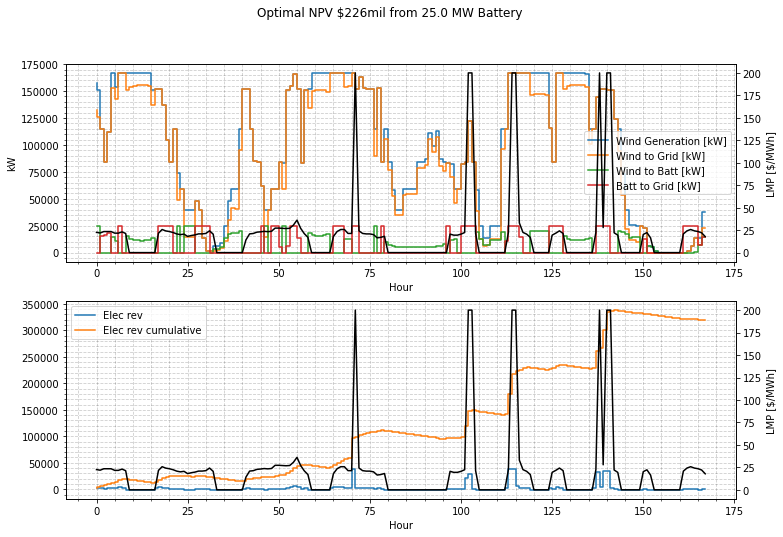

wind mw 200.0
batt mw 25.000000250069238
elec rev 319733.7045604261
annual rev 16626152.637142159
npv 225584716.8798638


In [4]:
from dispatches.models.renewables_case.wind_battery_LMP import wind_battery_optimize

wind_mw, batt_mw, rev, NPV = wind_battery_optimize()

design_outputs['Wind + Batt'] = {
    'wind_mw': wind_mw, 'batt_mw': batt_mw, 'Rev_E': rev, 'NPV': NPV
}

## Wind + PEM + Tank

Assuming existing wind farm of 200 MW

    model.name="unknown";
      - termination condition: maxIterations
      - message from solver: Ipopt 3.12.11\x3a Maximum Number of Iterations
        Exceeded.


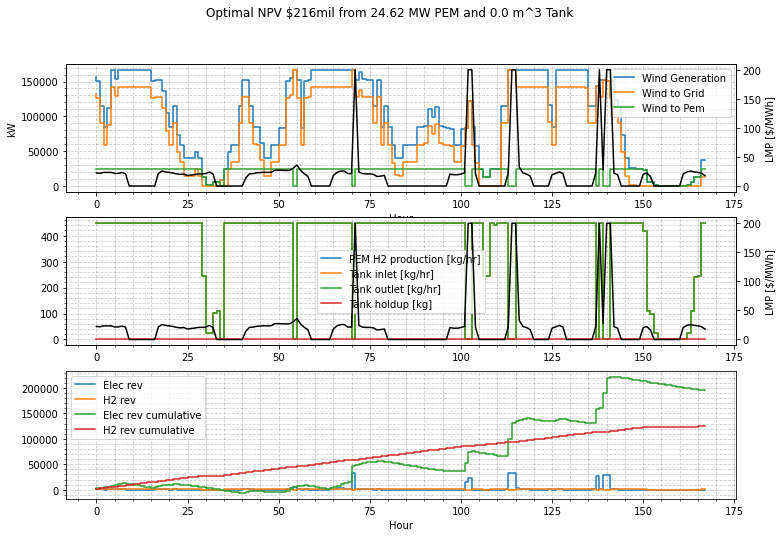

wind mw 200.0
pem mw 24.619308957885046
tank M^3 0.0
h2 rev week 125478.49332830812
elec rev week 194914.70887937155
annual rev 16660446.514799334
npv 215982424.53340107


In [5]:
from dispatches.models.renewables_case.wind_PEM_tank_LMP import wind_pem_tank_optimize

wind_mw, pem_mw, tank_m3, rev_h, rev_e, NPV = wind_pem_tank_optimize()

design_outputs['Wind + PEM + Tank'] = {
    'wind_mw': wind_mw, 'pem_mw': pem_mw, 'Rev_H': rev_h, 'Rev_E': rev, 'NPV': NPV, 'tank_m3': tank_m3
}

## Wind + Battery + PEM

Assuming existing wind farm of 200 MW

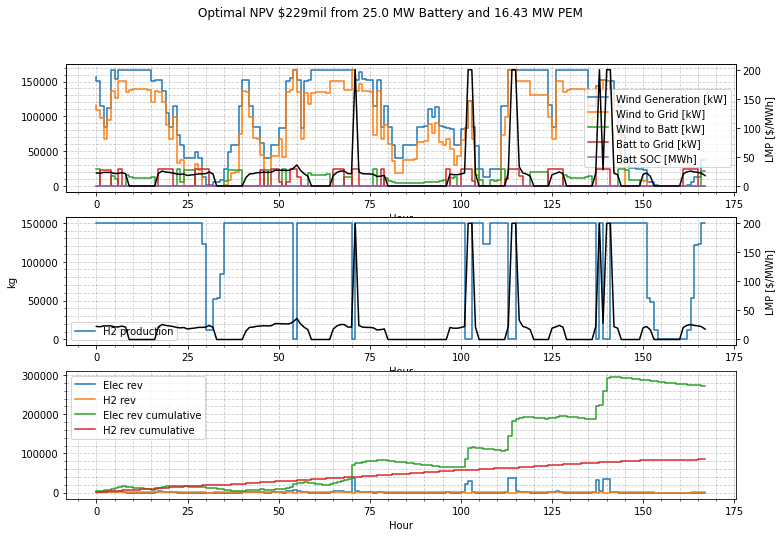

wind mw 200.0
batt mw 25.000000250208014
pem mw 16.428095027040637
h2 rev 85344.78379744179
elec rev 272708.8241860334
annual rev 18618787.6151407
npv 229438605.5993573


In [5]:
from dispatches.models.renewables_case.wind_battery_PEM_LMP import wind_battery_pem_optimize

wind_mw, batt_mw, pem_mw, rev_h, rev_e, NPV = wind_battery_pem_optimize()

design_outputs['Wind + Batt + PEM'] = {
    'wind_mw': wind_mw, 'batt_mw': batt_mw, 'Rev_H': rev_h, 'Rev_E': rev, 'NPV': NPV, 'pem_mw': pem_mw
}

## Wind + Battery + PEM + Tank

Assuming existing wind farm of 200 MW

    model.name="unknown";
      - termination condition: maxIterations
      - message from solver: Ipopt 3.12.11\x3a Maximum Number of Iterations
        Exceeded.


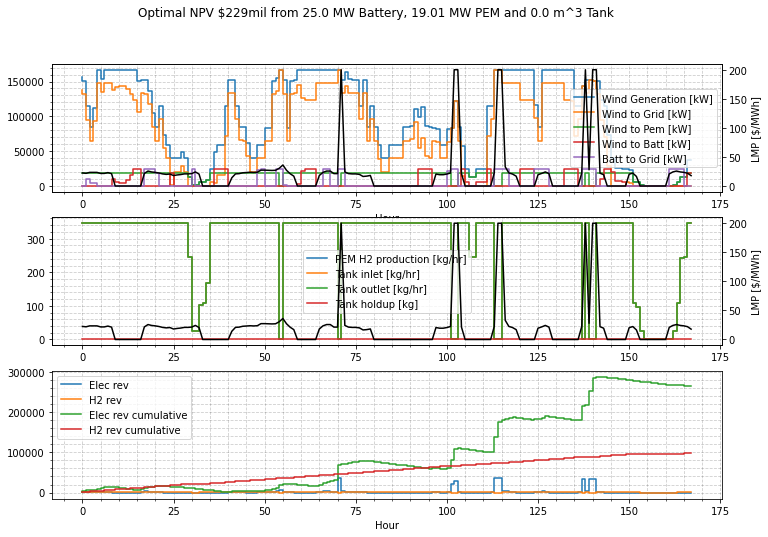

wind mw 200.0
batt mw 25.00000024998506
pem mw 19.008215435893284
tank m^3 5.910907366432306e-11
h2 rev week 98115.53331001589
elec rev week 264815.2533089282
annual rev 18872400.904185105
npv 229131667.1987955


In [6]:
from dispatches.models.renewables_case.wind_battery_PEM_tank_LMP import wind_battery_pem_tank_optimize

wind_mw, batt_mw, pem_mw, tank_m3, rev_h, rev_e, NPV = wind_battery_pem_tank_optimize()

design_outputs['Wind + Batt + PEM + Tank'] = {
    'wind_mw': wind_mw, 'pem_mw': pem_mw, 'Rev_H': rev_h, 'Rev_E': rev, 'NPV': NPV, 'tank_m3': tank_m3, 'batt_mw': batt_mw
}

## Wind + Battery + PEM + Tank + Turbine

Assuming existing wind farm of 200 MW

wind mw 200.0
batt mw 0.27
pem mw 20.0
tank m^3 0.015707963267948967
turb mw 70.0
h2 rev week 6054.586168363006
elec rev week 227636.2726999529
annual rev 12151924.661152419
npv 83880502.31118762


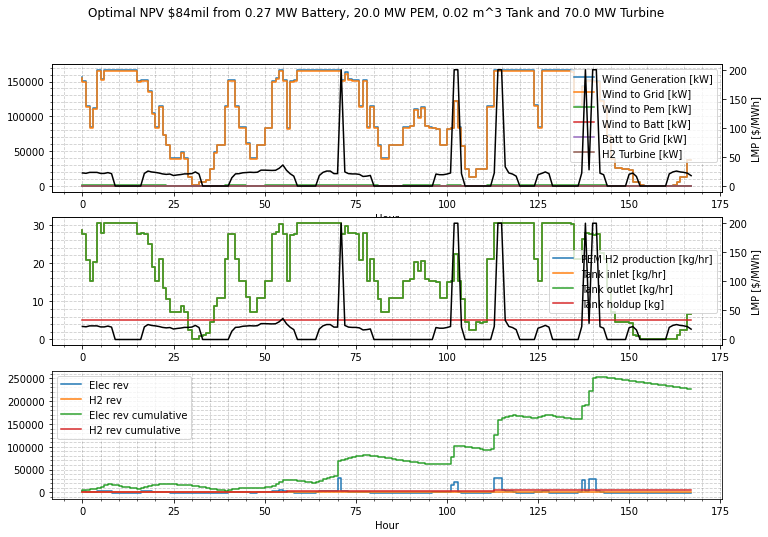

In [7]:
from dispatches.models.renewables_case.wind_battery_PEM_tank_turbine_LMP import wind_battery_pem_tank_turb_optimize

wind_mw, batt_mw, pem_mw, tank_m3, turb_mw, rev_h, rev_e, NPV = wind_battery_pem_tank_turb_optimize()

design_outputs['Wind + Batt + PEM + Tank + Turb'] = {
    'wind_mw': wind_mw, 'pem_mw': pem_mw, 'Rev_H': rev_h, 'Rev_E': rev, 'NPV': NPV, 'tank_m3': tank_m3, 'batt_mw': batt_mw, 'turb_mw': turb_mw
}

In [11]:
df = pd.DataFrame.from_dict(design_outputs, orient='index')
df.insert(2, 'Rev_H', df.pop("Rev_H"))
df


,NPV,Rev_E,Rev_H,wind_mw,pem_mw,batt_mw,tank_m3,turb_mw
Wind,-9.998563e+07,263976.690506,NaN,200.0,NaN,NaN,NaN,NaN
Wind + PEM,2.162426e+08,194901.996652,125817.079722,200.0,24.619503,NaN,NaN,NaN
Wind + Batt,2.255847e+08,319733.704560,NaN,200.0,NaN,25.000000,NaN,NaN
Wind + PEM + Tank,2.159824e+08,319733.704560,125478.493328,200.0,24.619309,NaN,0.000000e+00,NaN
Wind + Batt + PEM,2.294386e+08,319733.704560,85344.783797,200.0,16.428095,25.000000,NaN,NaN
Wind + Batt + PEM + Tank,2.294184e+08,319733.704560,85295.583405,200.0,16.430687,25.000059,1.312129e-14,NaN
Wind + Batt + PEM + Tank + Turb,1.704629e+08,319733.704560,60545.861401,200.0,20.000000,0.270000,3.926991e-03,100.0
